In [1]:
import os
import time

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
def json2list(source):
    text=[source['text'][i] for i in source['text']]
    score=[source['score'][i] for i in source['score']]
    return text,score

In [1]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)

In [4]:
m=month('2017-06','2020-05')
root_path=os.getcwd()
category=os.listdir(root_path+'\\sentiment\\')
category

['Bank Brokerage', 'Discount Brokerage', 'Full Brokerage', 'Robo Advisor']

In [5]:
def readjson():
    data=[[] for i in range(4)]
    root_path=os.getcwd()
    category=os.listdir(root_path+'\\sentiment\\')
    for i in range(4):
        path=root_path+'\\sentiment\\'+category[i]+'\\'
        for j in m:
            temp=json.loads(json.load(open(path+j+'.json')))
            data[i].append(json2list(temp))
    return data

def subanalyze(data,keywords): # data hierarchy: months*(text,score)*piece
    polarity=[]
    freq=[]
    for k in data:
        score=0
        count=0
        for x,i in enumerate(k[0]):
            for j in keywords:
                if j in i.lower():
                    score+=k[1][x]
                    count+=1
                    break
        polarity.append(score/max(1,count))
        freq.append(count)
    return polarity,freq

def trend(data,keyword_list):
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(m),app[0],color='C1')
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax1.set_ylabel('Sentiment Polarity')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax2.bar(m,app[1],alpha=0.3)
    ax2.set_ylabel('Sentiment Frequency')
    ax1.set_title('Keywords: '+', '.join(keyword_list))
    plt.show()
    
def all_trend(data,keyword_list):
    app=[subanalyze(i,keyword_list) for i in data]
    matplotlib.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
    for i in range(2):
        for j in range(2):
            temp=2*i+j
            
            ax[i][j].plot(np.array(m),app[temp][0],color='C1')
            ax[i][j].set_xticks(np.arange(36))
            ax[i][j].set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
            if not j:
                ax[i][j].set_ylabel('Sentiment Polarity')
            for t in ax[i][j].xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax[i][j].xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2 = ax[i][j].twinx()
            for t in ax2.xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax2.xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2.set_xticks(np.arange(36))
            ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
            ax2.bar(m,app[temp][1],alpha=0.3)
            if j:
                ax2.set_ylabel('Sentiment Frequency')
            ax[i][j].set_title(category[temp])
    plt.suptitle('Keywords: '+', '.join(keyword_list))
    plt.show()

def show(entity,month,keyword):
    a,b=0,0
    result=[]
    for x,i in enumerate(data[entity][month][0]):
        s=0
        for j in keyword:
            if j in i:
                s=1
        if s:
            #print(i,data[entity][month][1][x])
            result.append((i,data[entity][month][1][x]))
    return sorted(result,key=lambda x : x[1])

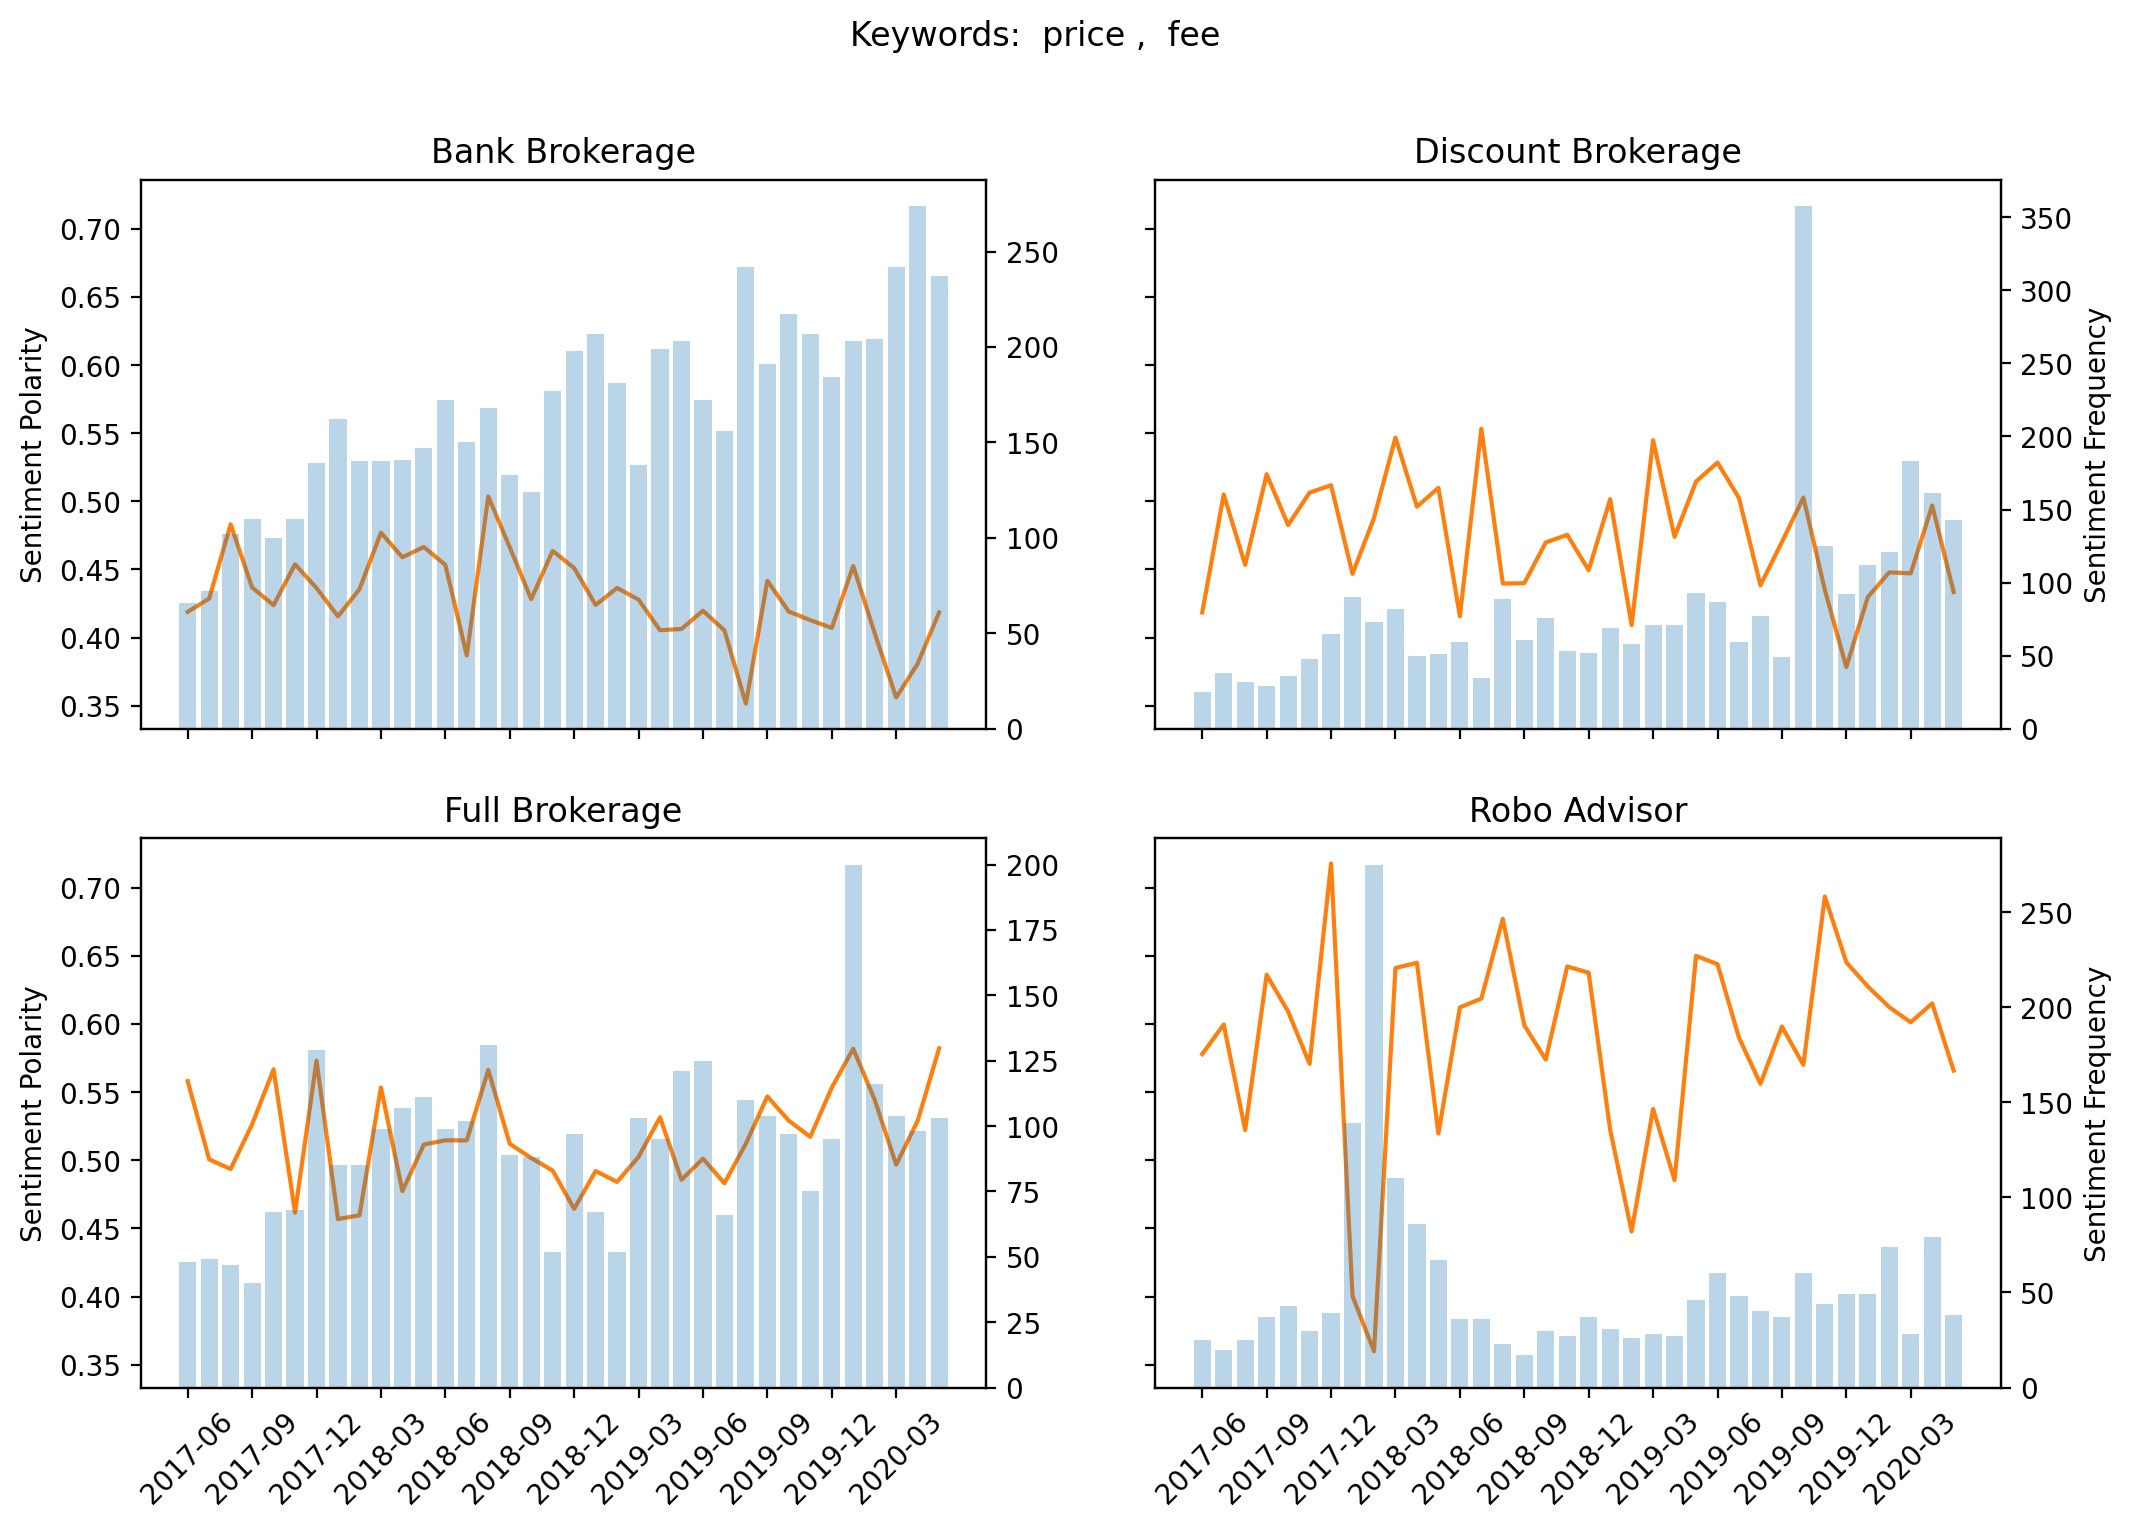

In [138]:
all_trend(data,[' price ', ' fee '])

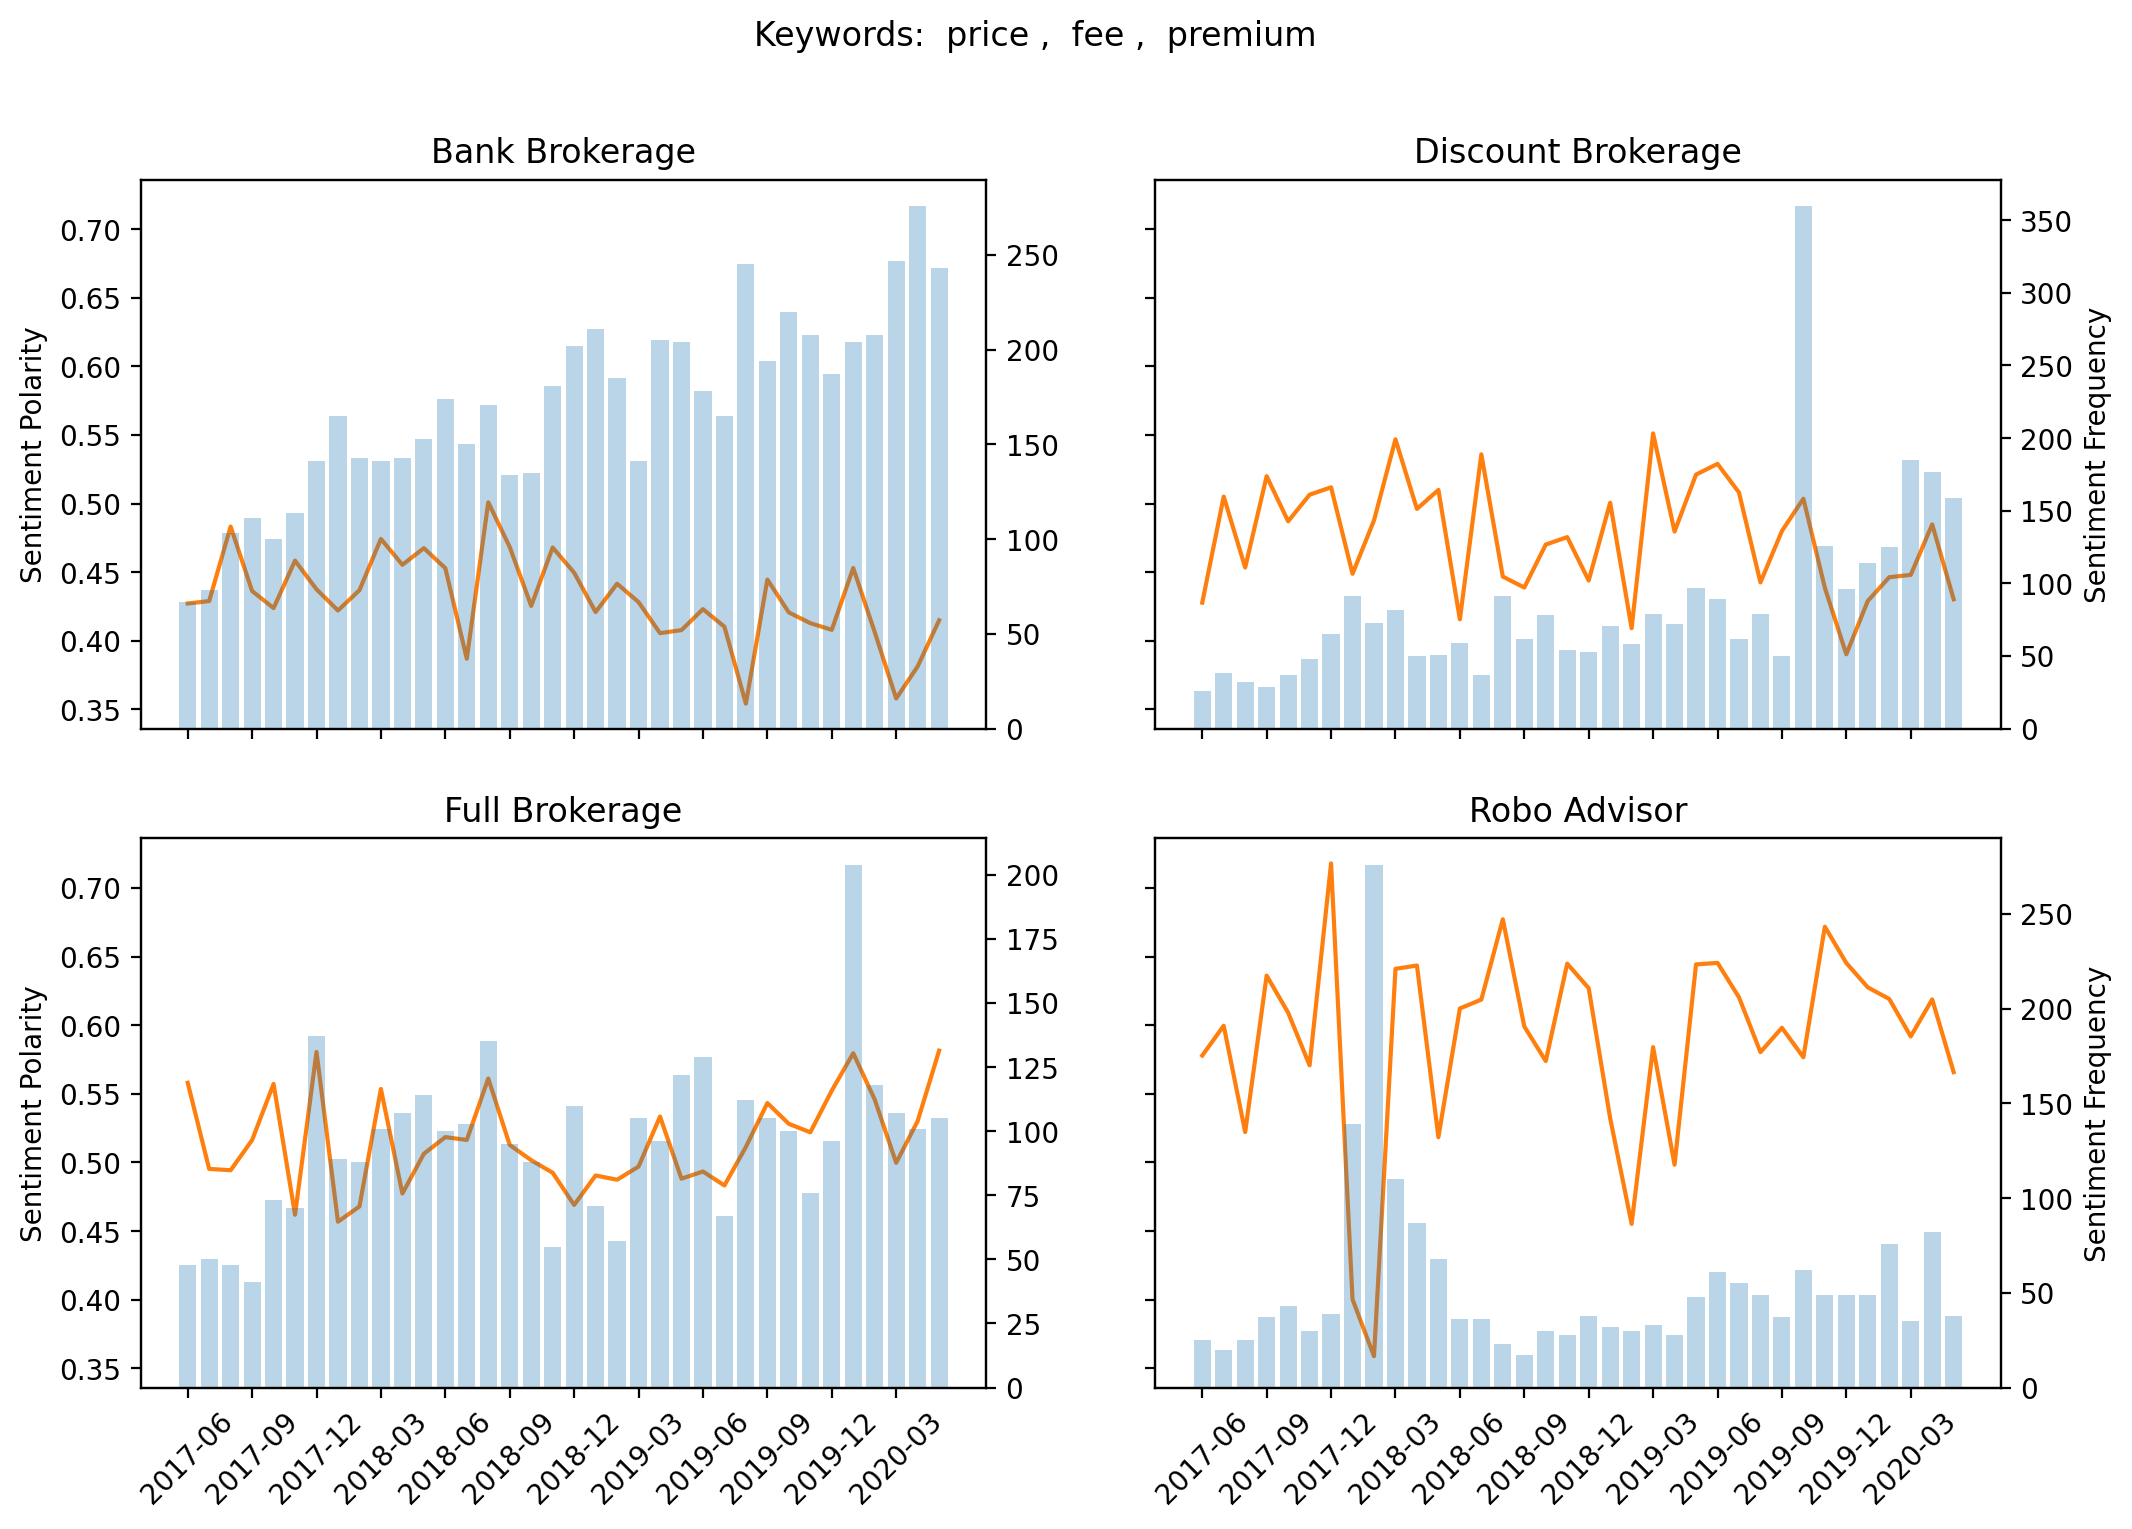

In [158]:
all_trend(data,[' price ', ' fee ', ' premium '])

In [153]:
show(3,8,[' price ', ' fee '])

[('last week wealthfront announced theyre adding expensive proprietary fund investment model yet still tout low advisory fee functional equivalent airline bragging low base fare yet charging excessive baggage fee',
  0.0767951012),
 ('full cost arent even included fund management fee total return swap cost arent included theyre cheap firm assumes cost month treasury plus bps spread interest rate rise cost increase',
  0.1141754091),
 ('im surprised see wealthfront implement high fee actively managed risk parity fund given fact publicly available fund performed poorly',
  0.1249767616),
 ('fair nothing wrong fee thats cost average mutual fund transparent cant claim radically lowered fee neglect mention swap',
  0.13222),
 ('current pm fee bps wont take bp le', 0.1504136622),
 ('ostk tzero advisor launch roboadvisor digital investment platform rip blink eye price back previous support',
  0.1808561683),
 ('advice currently undervalued take position target stop set current price closed tr

In [164]:
show(1,-8,[' price ', ' fee ',])

[('tdameritrade disappointed way mobile app working stock time see much difference stock price displayed ordered purchase ameritrade order show pending robinhoodapp purchased immediately',
  0.0260656904),
 ('truly sad canadian bank offer free trade american subsidizes extra high fee canadian tddirectinvest tdcanada',
  0.0342137925),
 ('charles schwab ending commission online trading u stock etf option culmination yearslong fee battle brokerage industry schwab fell fear change hit margin td ameritrade fell etrade fell',
  0.0561023019),
 ('charlesschwab killing ibkr td etfc announcement fee stock', 0.069412604),
 ('charles schwab wont charge commission fee online trade anymore order investing accessible millenials assume gotta keep time complaining though limit order followed new change cant spare extra penny',
  0.0833444446),
 ('still charge cent per option contract fee thats wack', 0.1023946479),
 ('cant money otc trade tied fee company let trade free look u consumer like td amerit

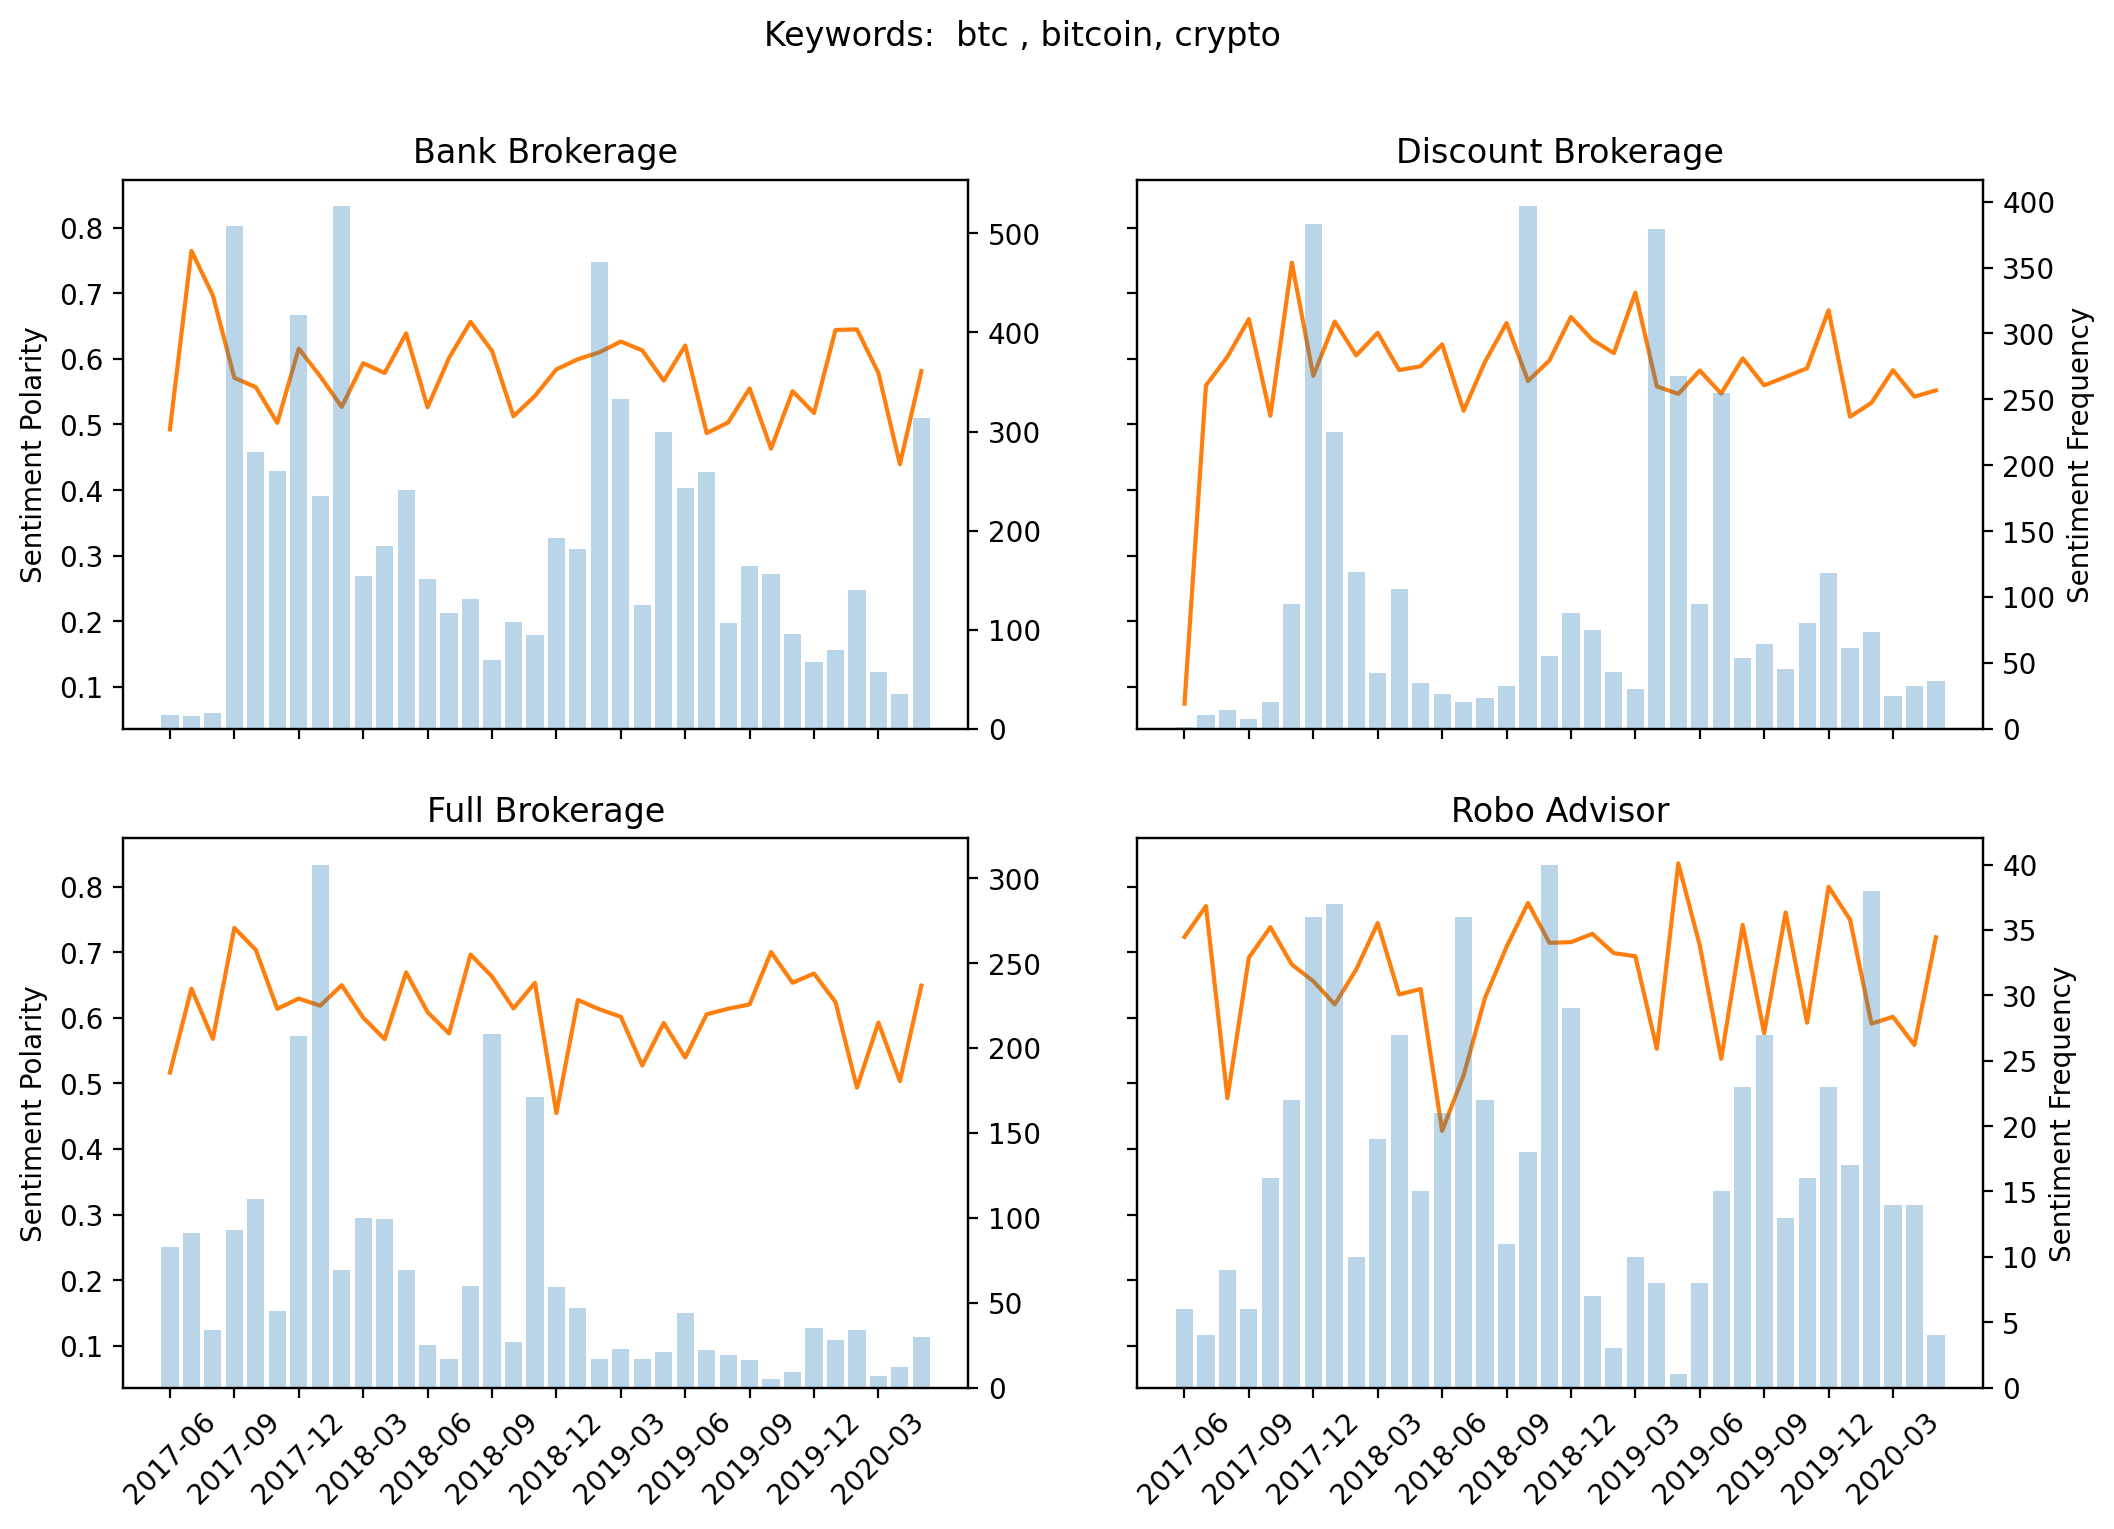

In [140]:
all_trend(data,[' btc ','bitcoin', 'crypto'])

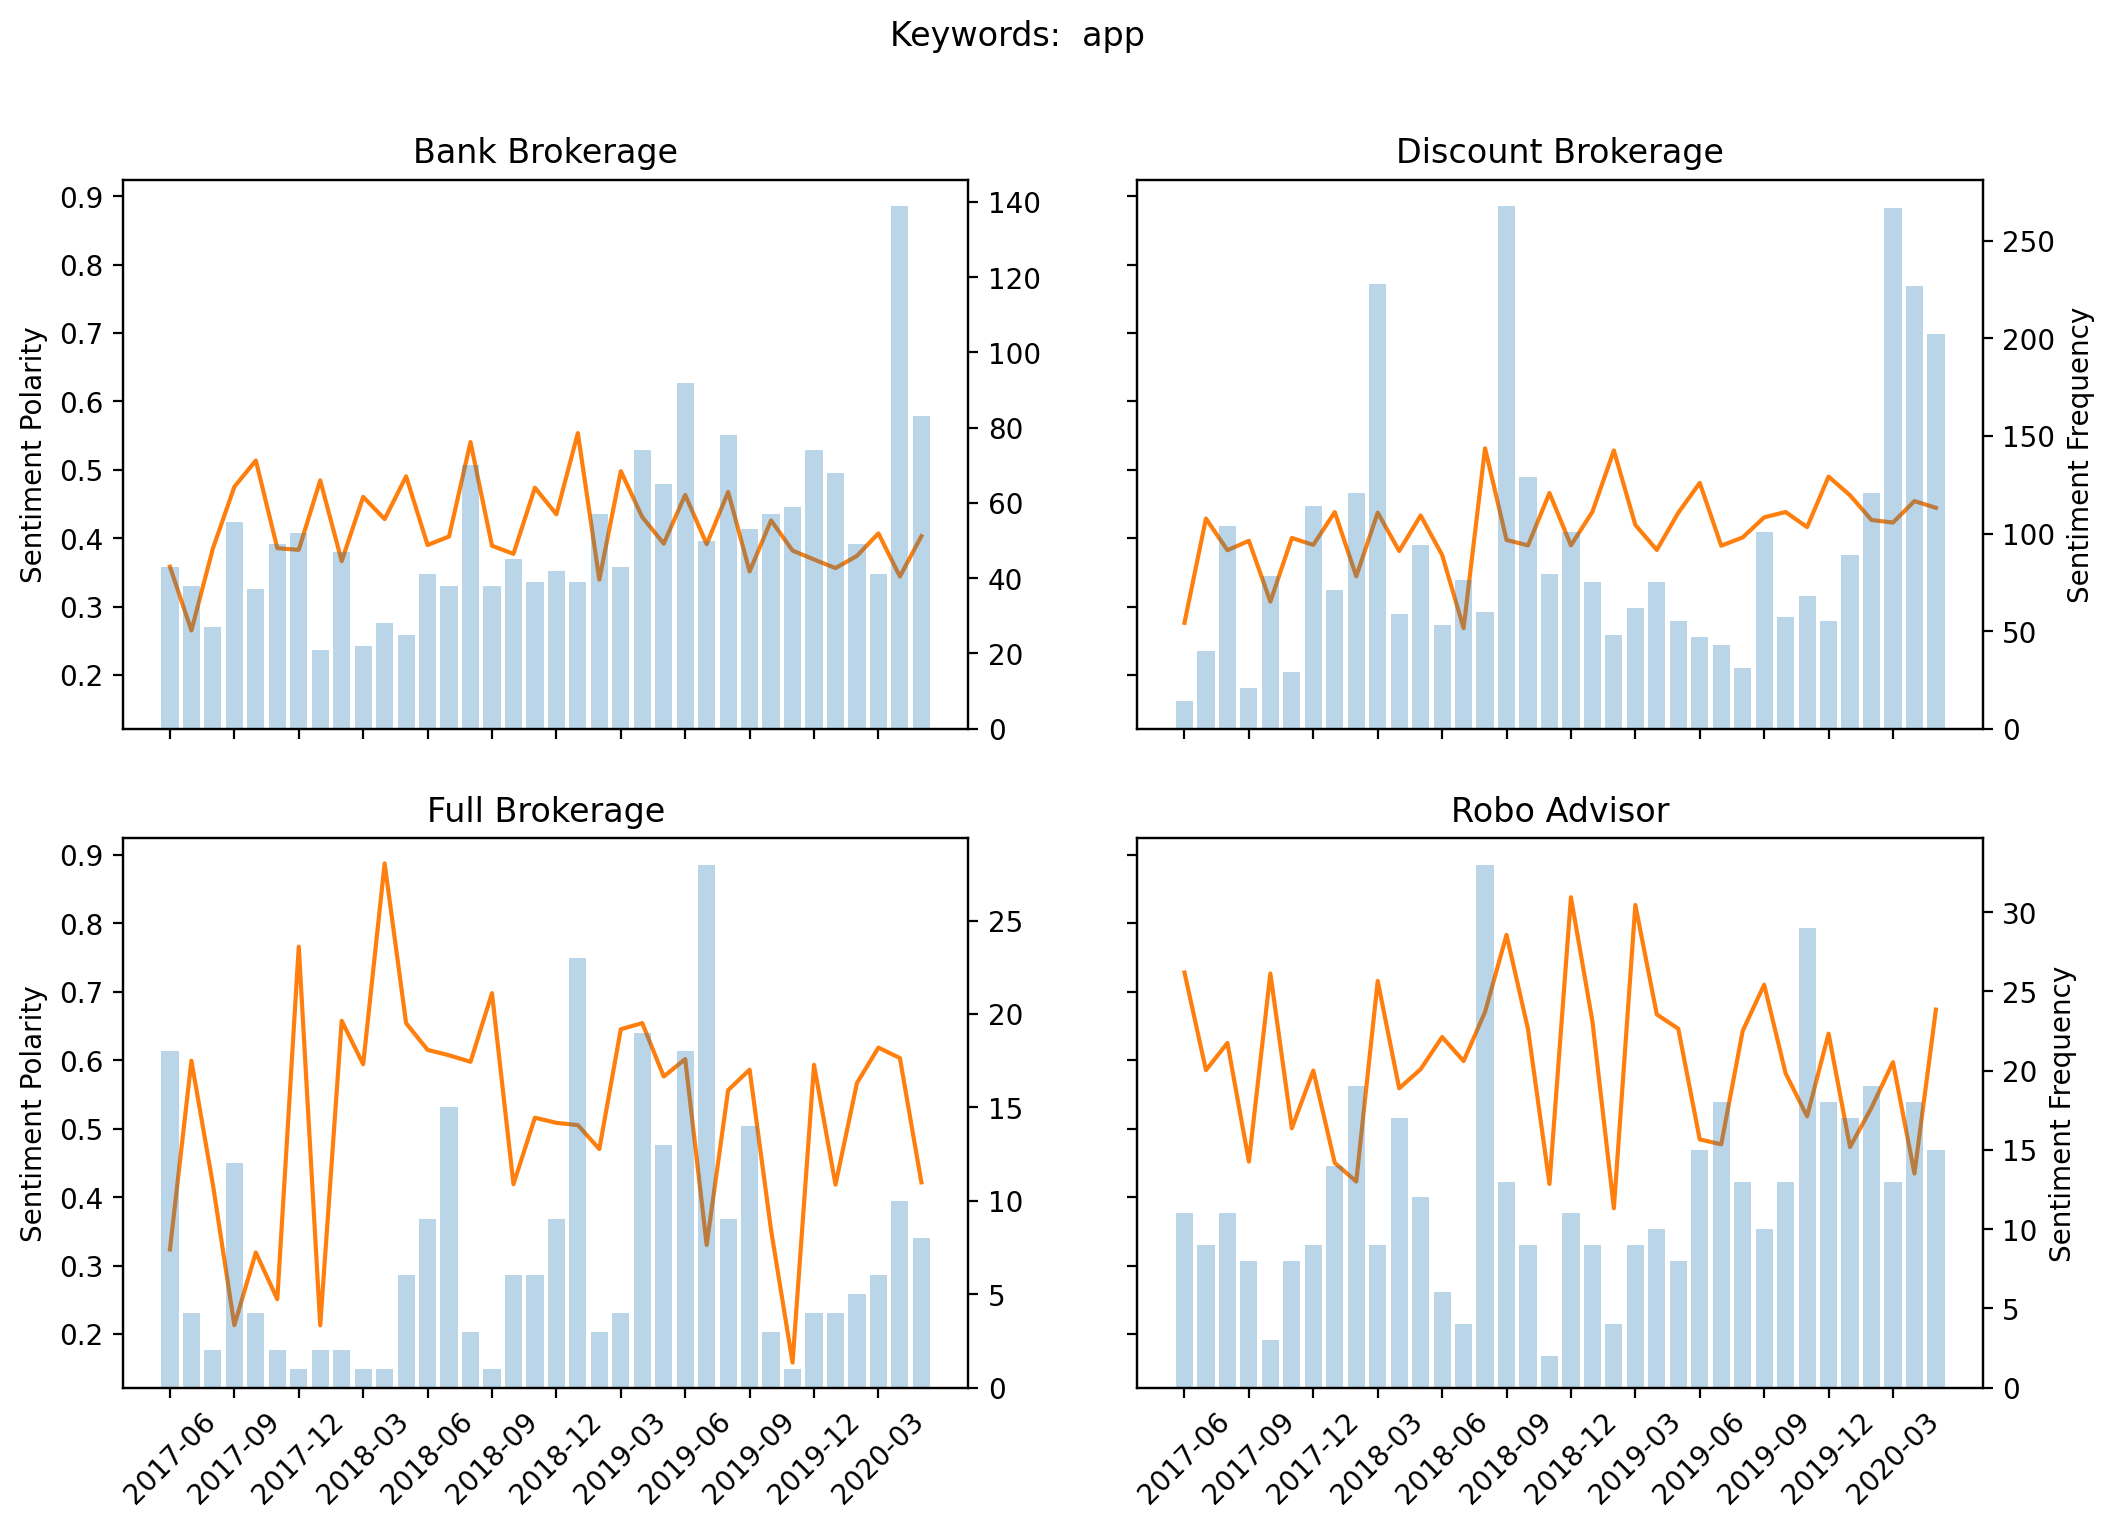

In [141]:
all_trend(data,[' app '])

In [145]:
show(2,-8,[' app ',])

[('realdonaldtrump get wanted youngest president morganstanley let build medium empire network apps number dating app smartphone pay feature lied oath potus know work',
  0.1863945276),
 ('looking come back china job browse job company like morgan stanley asia pwc shanghai bytedance liulishuo download app apply job resume get response',
  0.3956941366),
 ('merrill lynch app whole server seems crashed glad im problem',
  0.4728494287)]

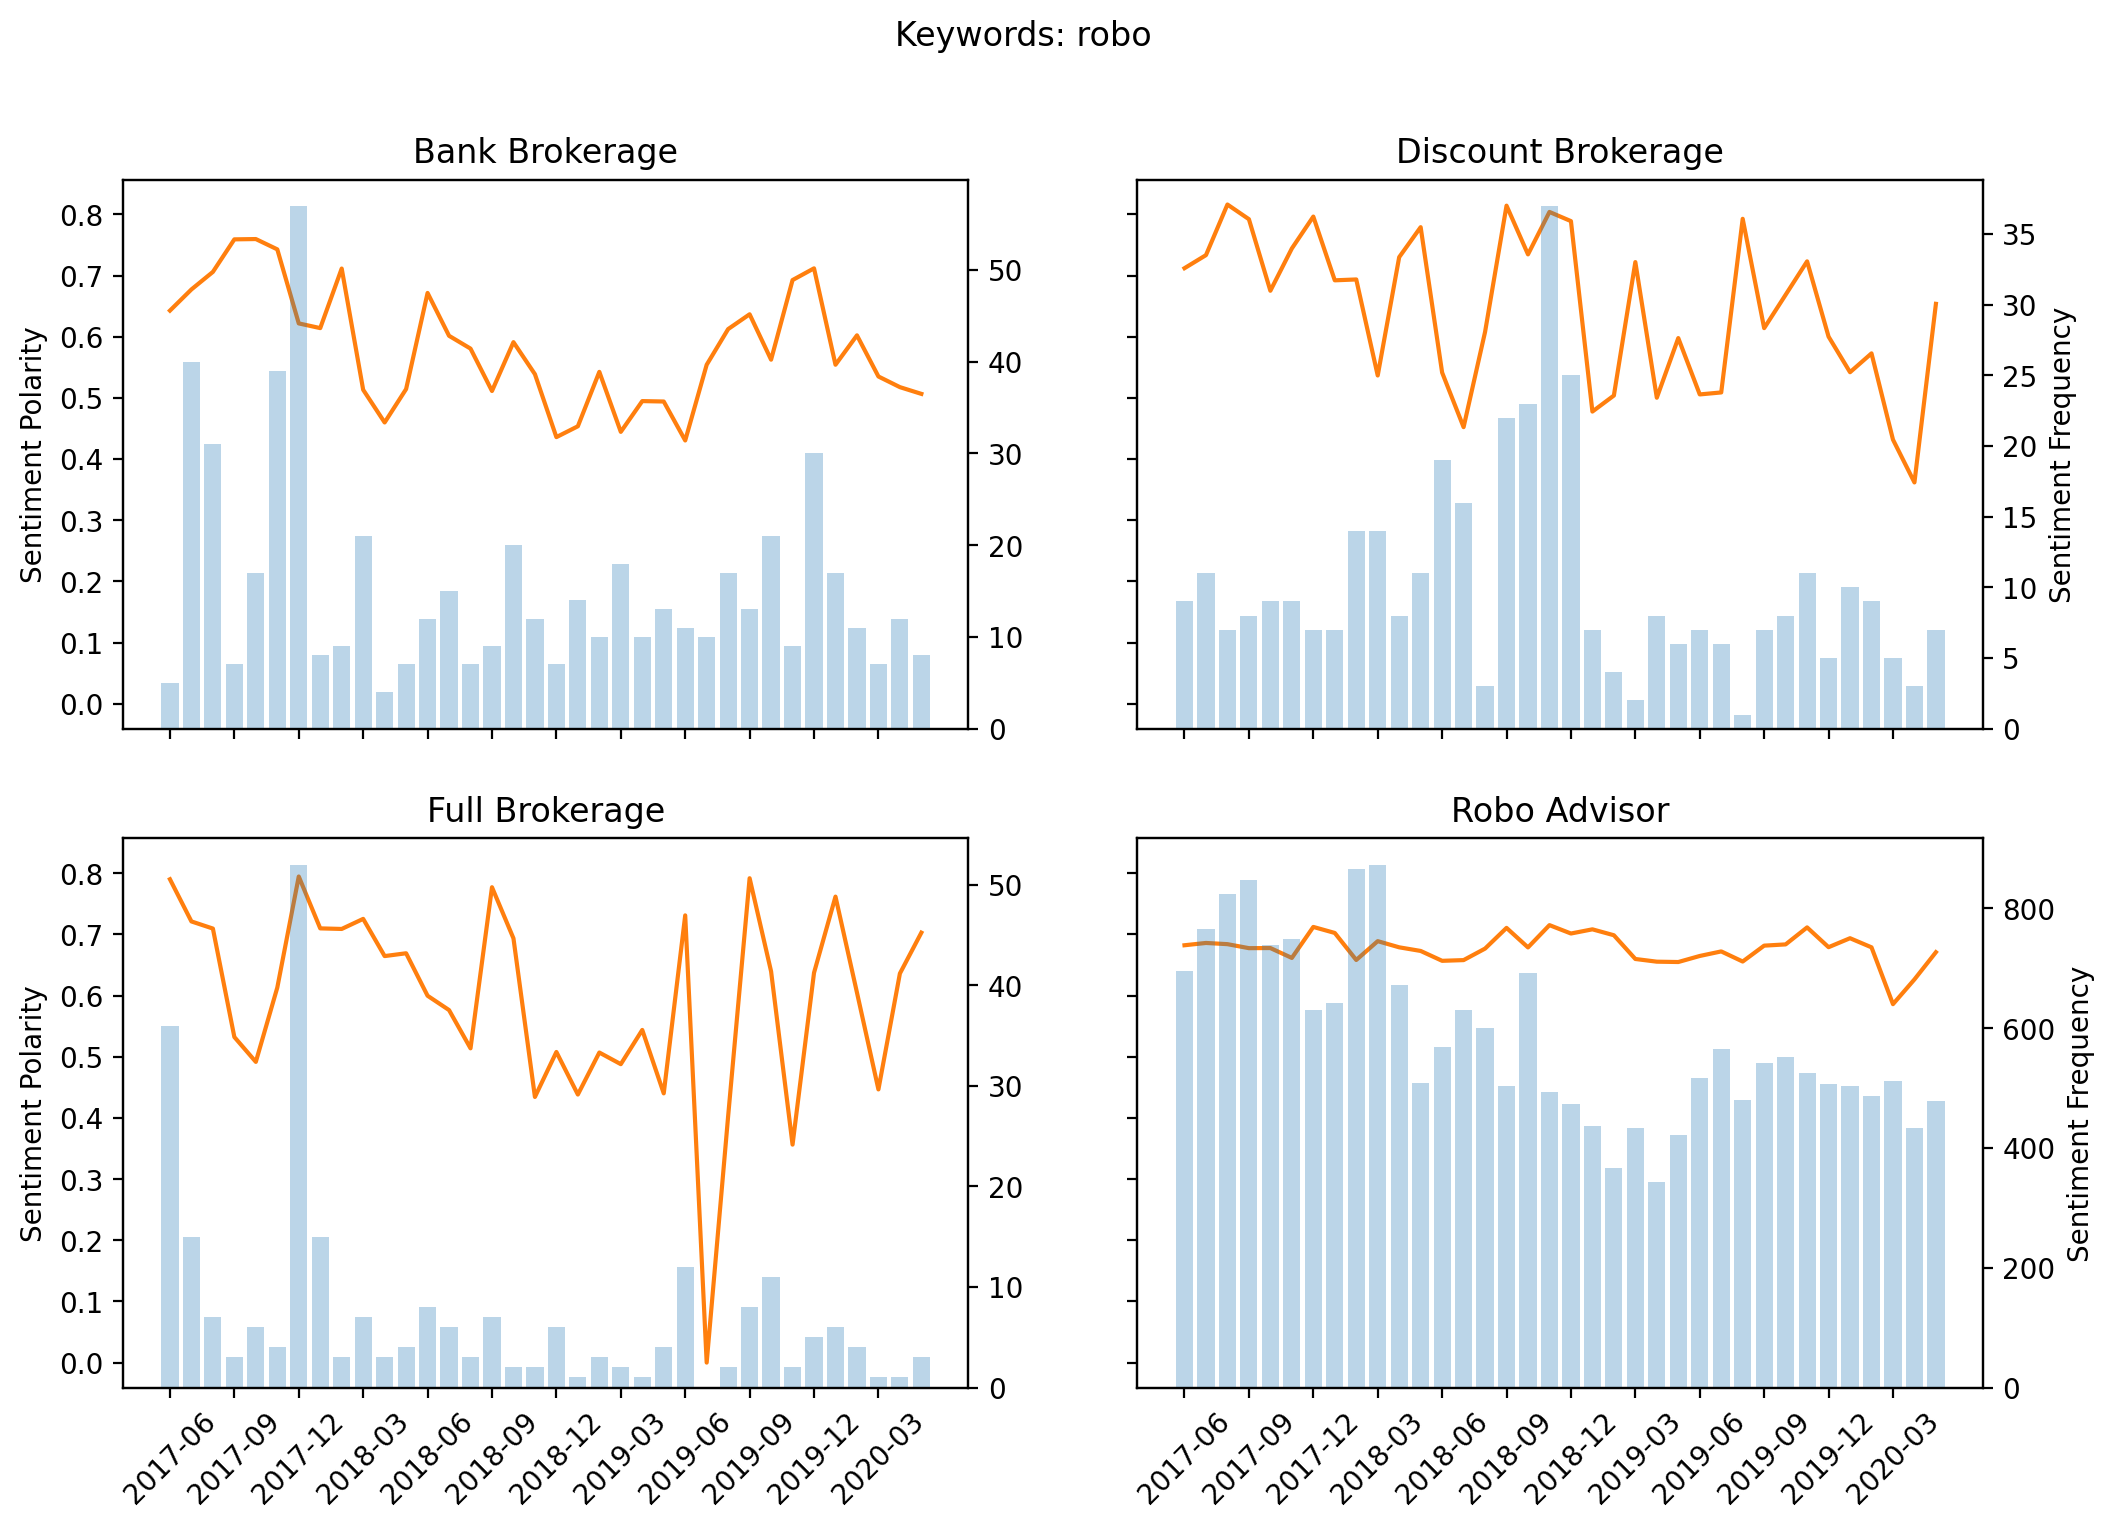

In [148]:
all_trend(data,['robo'])

In [151]:
show(3,-3,['robo',])

[('cant get roboadvisor phone', 0.0178979635),
 ('find lying questionnaire robo advisor sell option available understanding stock none wtf',
  0.0285611935),
 ('rip wall street roboadvisors nextmoney', 0.0315952189),
 ('rip wall street roboadvisors nextmoney', 0.0315952189),
 ('person wish would die corona virus cant robo advisor', 0.033641506),
 ('person wish would die corona virus cant robo advisor', 0.033641506),
 ('wont roboadvisor allow go stonks rn', 0.0479745008),
 ('funny watching robo advisor investment account trying rebalance market volatility funny scary sad',
  0.0481020212),
 ('funny watching robo advisor investment account trying rebalance market volatility funny scary sad',
  0.0481020212),
 ('robo advisor practically ubiquitous cant go anywhere financial internet without seeing ad robo advisorusnewsinvesting',
  0.050910648),
 ('robo advisor practically ubiquitous cant go anywhere financial internet without seeing ad robo advisorusnewsinvesting',
  0.050910648),
 ('dit

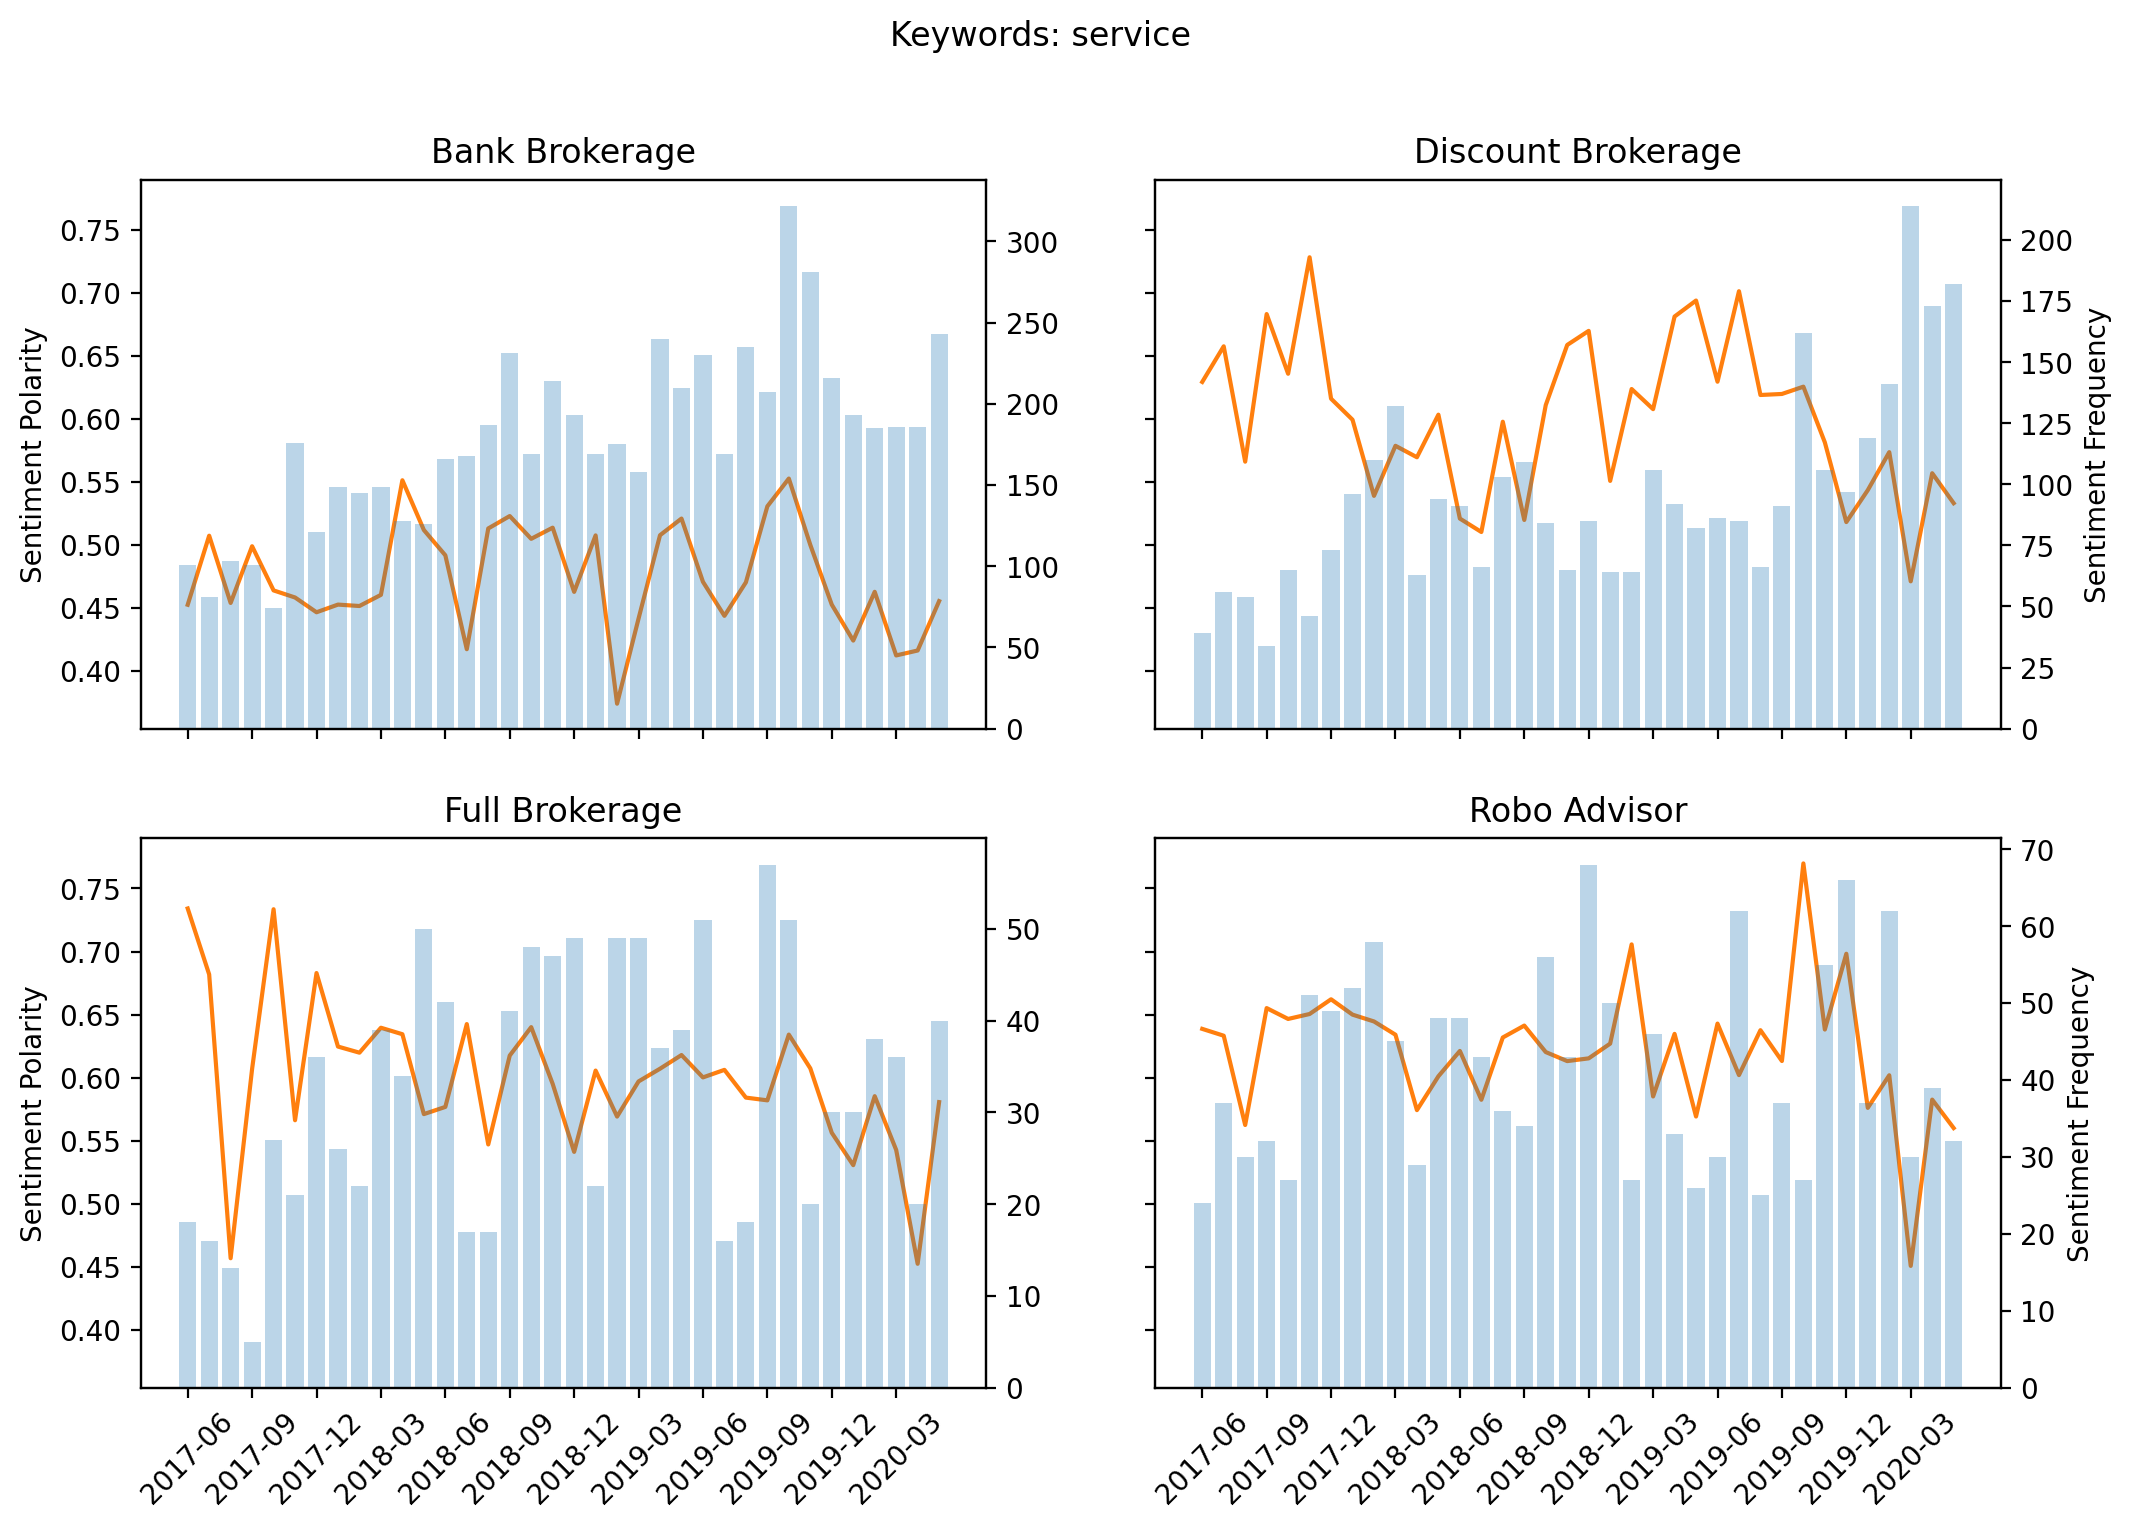

In [170]:
all_trend(data,['service'])

In [172]:
show(0,m.index('2019-02'),['service']) # wells fargo

[('well fargo worst bank ever went ask simple day favor said sorry cant help customer kind service considering issue caused debit card account issue supposed customer gosh sad',
  0.0057360334),
 ('wellsfargo unauthorized charge account cant even answer phone assist worst service world card likely compromised cant even help answering phone',
  0.0128393695),
 ('fuck wellsfargo shitty as customer service cant get answer owe much loan supposed paid couple month',
  0.0141130956),
 ('canceled service back kept billing card dispute cancellation cannot get human talk support number warning use',
  0.0172583554),
 ('hate wellsfargo customer service suck', 0.0210278332),
 ('website isnt working spend effort ridiculous tweeting garbage cant service customer get bank holiday internet',
  0.0257328507),
 ('chip failed card reason cust service refuse send told must go get temp cancel order new mobile banking always cant link apps like mint ever doesnt matter opened chase account',
  0.0282080881)

In [174]:
show(2,2,['service'])

[('getting sick seeing feed remind though ill never use service',
  0.0538852103),
 ('moody investor service morgan stanley co international plc semiannual update',
  0.1818723083),
 ('president trump service america continue spend billion country dont pay fair share',
  0.2547176778),
 ('would pay healthcare would payment go financial service', 0.3248741925),
 ('hit global financial service major read', 0.3436384499),
 ('global financial condition important american worker mostly service employee living weaker',
  0.3963457048),
 ('celainef kind financial service health care service internet service offered available',
  0.4492491186),
 ('bank america merrill lynch launch mobile payment service china',
  0.5012782216),
 ('mccains service smoke mirror big fat liehis daddy influenced official record appear honorable',
  0.5469311476),
 ('bullshyt drivel ive ever read financial service firm founding morgan rolling graf',
  0.585709691),
 ('merrill lynch financial service company bank cou

In [175]:
show(3,-3,['service'])

[('man im losing much hope using service', 0.0534723029),
 ('man im losing much hope using service', 0.0534723029),
 ('wow im appreciative opportunity especially since thats going taking huge toll work independent tutor mostly inperson nypl closed month family scared close contact longer afford service',
  0.0954512656),
 ('wow im appreciative opportunity especially since thats going taking huge toll work independent tutor mostly inperson nypl closed month family scared close contact longer afford service',
  0.0954512656),
 ('retailer shelf empty bit stressed couple week ago back normal service industry still shit',
  0.1249744669),
 ('financial service may losing battle adopt technology disruptors roboadvisors expected manage trillion read cc ronaldvanloon pawlowskimario nicochan jblefevre',
  0.1554184556),
 ('using wealthfront betterment roboadvisor service challenge beat vfiax wont able',
  0.1995743662),
 ('using wealthfront betterment roboadvisor service challenge beat vfiax won

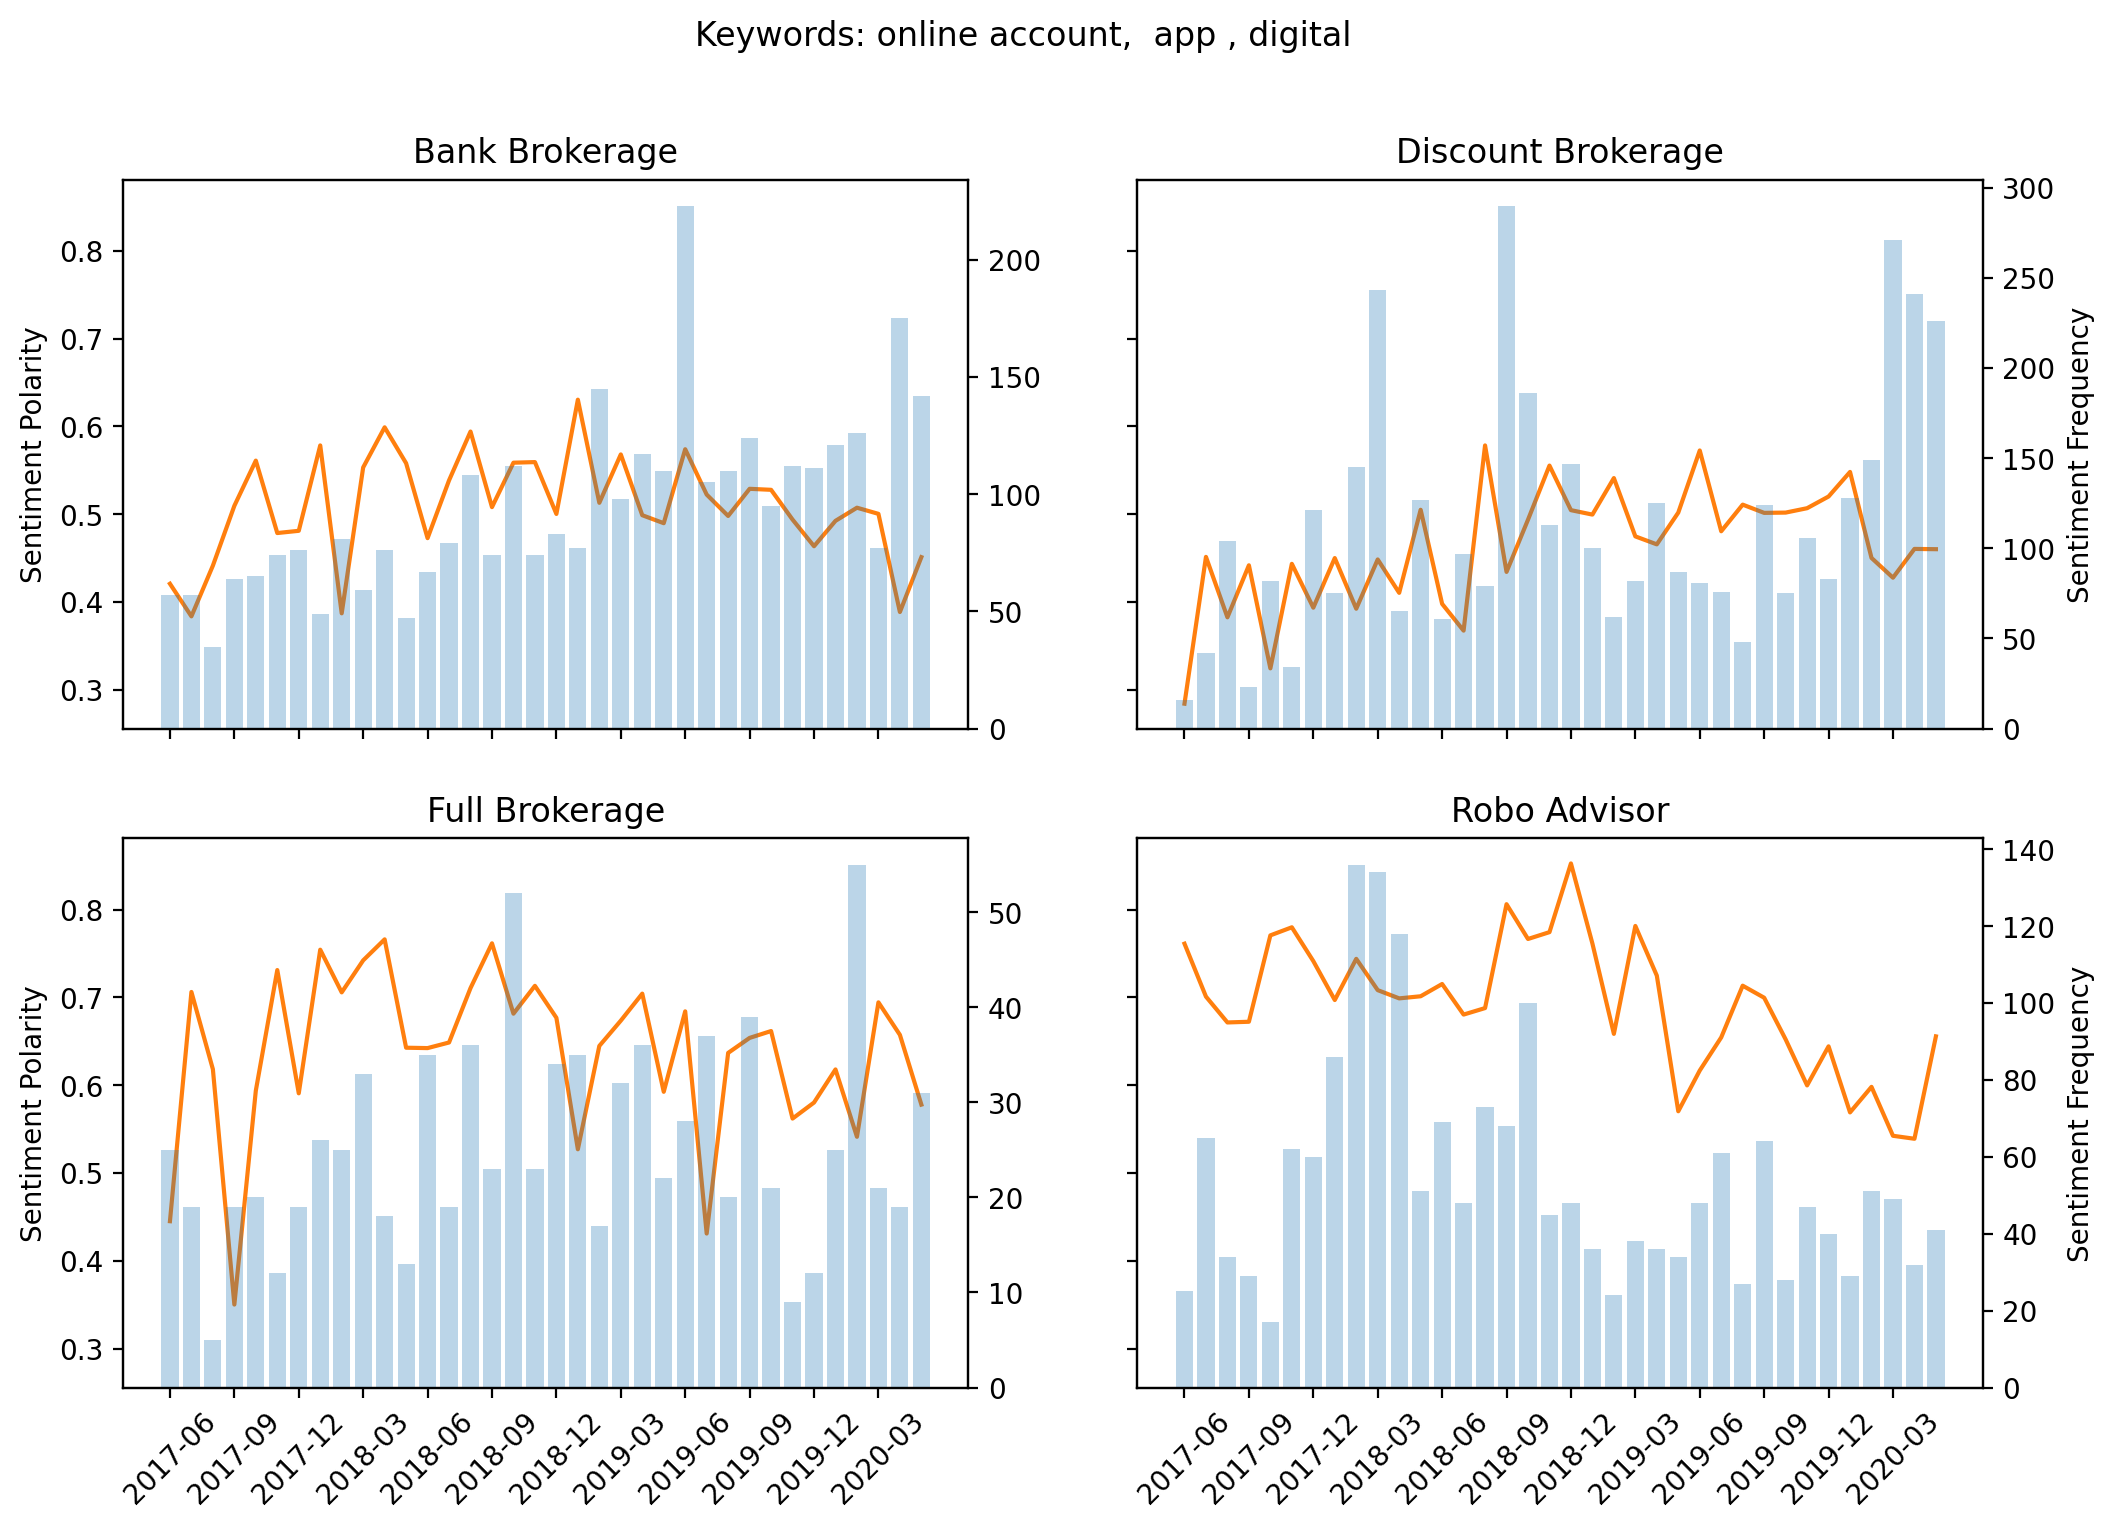

In [181]:
all_trend(data,['online account', ' app ','digital'])

In [183]:
show(0,m.index('2019-06'),['online account', ' app ','digital'])

[('wellsfargo mobile app isnt work either website long outage', 0.0251582731),
 ('arent allowed exception burden changing dad dealt much older client couldnt get helped bank wanted send code put app flip phone',
  0.0260281842),
 ('android mobile app browser please dont ask sure computer im leaving bankofamerica chase',
  0.0539501458),
 ('wellsfargo cant figure app doesnt crashgo offline every single month around payday personally invest money fabrege egg keep house away grubby fat finger',
  0.0560289584),
 ('well fargo app work faceid broken', 0.0709061027),
 ('askwellsfargo wellsfargo app working im customer defended crappy mobile app doesnt work considering thats deposit check receive',
  0.0804063901),
 ('hell yea know fact still wit well fargo prolly woulda fight nigga bout cash app lame af cant use shit',
  0.0858264565),
 ('jpmorgan chase closed digital bank finn customer transferred existing account significant difference finn bank conventional mobile banking app financialbra

In [10]:
wf0=[]
for i in m:
    try:
        wf0+=json.load(open(root_path+'\\data\\Wealthfront\\Wealthfront'+i+'.json'))
    except:
        continue

In [16]:
wf=total_clean(wf0)
a,b=np.unique([i['username'] for i in wf],return_counts=True)
c,d=np.unique([i['screen_name'] for i in wf],return_counts=True)

In [18]:
list(a[np.argsort(b)][::-1])

['Wealthfront',
 'Robo-Advisor Pros',
 'Brian D. Colwell',
 'Kate Wauck',
 'Barbara Friedberg',
 'Bill Winterberg CFP®',
 'Andy Rachleff',
 'tyler hogge 🎯',
 'Jake',
 'MichaelKitces',
 'ESCAPE DEBT',
 'Ryan Jones',
 'iCyber Institute™',
 'Investors Europe',
 'Financial Planning',
 'Investormint',
 'Stock News Times',
 'Michael Aguiar',
 'Ross Gerber',
 'John Schmoll',
 'Adam Nash',
 'Meb Faber',
 'Vanessa',
 'The Lincolnian',
 'Paul Stamatiou 🏡',
 'Hannah Levy',
 'Week Herald',
 'Baseball News Source',
 'TheFutureOfAssetMgt',
 'Adam Butler',
 'Dispatch Tribunal',
 'Rex Salisbury',
 'Daniel McAuley',
 'Sar Haribhakti',
 'Startup Ideas',
 'Stock Brokers',
 'Felix Salmon',
 'Watchlist News',
 'WealthManagement.com',
 'Credit Union & Banks',
 'Accumulate Wealth',
 'PlanGrid, an Autodesk product',
 'I Love Startups',
 'Money Making Articles Hot Stuff',
 'Daily Political',
 'blacq',
 'Dakota Financial',
 'Apkdot',
 'Sachin Rekhi',
 'Tía Cotilla Project',
 'Financial News',
 'Beez',
 'WhatsOn

In [218]:
list(np.sort(b)[::-1])

[2062,
 294,
 134,
 131,
 102,
 98,
 89,
 89,
 85,
 84,
 77,
 74,
 68,
 68,
 66,
 61,
 51,
 49,
 49,
 49,
 49,
 48,
 41,
 39,
 39,
 38,
 38,
 38,
 38,
 37,
 37,
 36,
 36,
 35,
 34,
 34,
 34,
 33,
 33,
 33,
 32,
 32,
 31,
 31,
 31,
 30,
 30,
 30,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,

In [23]:
def find(name):
    for i in wf:
        if name == i['username']:
            return i['screen_name']

In [26]:
find('Work at Wealthfront')

'WealthfrontJobs'

In [28]:
def find_user(data,username):
    result=[]
    for i in data:
        if i['username']==username:
            result.append(i['text'])
    return result,i

In [219]:
find_user(wf0,'Brian D. Colwell')

([' bearish on none of the they chose are ',
  ' requires a 500 minimum deposit that does not ',
  '#Wealthfront & #Betterment: bearish on #USD: none of the #foreign #ETFs they chose are #currency #hedged\nhttps://briandcolwell.com/2017/05/the-battle-of-the-roboadvisors-a-fintech-revolution/.html\xa0… #fintech',
  '#Wealthfront requires a $500 minimum deposit that #Betterment does not\nhttps://briandcolwell.com/2017/05/the-battle-of-the-roboadvisors-a-fintech-revolution/.html\xa0… #roboadvisor #fintech #wealthmanagement',
  ' Both use of lowcost ',
  '#Wealthfront & #Betterment: Both use #portfolios composed of low-cost #exchangetraded #funds\nhttps://briandcolwell.com/2017/05/the-battle-of-the-roboadvisors-a-fintech-revolution/.html\xa0… #fintech #etf #robo',
  ' offers free management at 10000 account balance Wealthfront ',
  '#Wealthfront offers free management at $10,000 account balance\nhttps://briandcolwell.com/2017/05/the-battle-of-the-roboadvisors-a-fintech-revolution/.html\xa0

In [29]:
find_user(wf0,'Kate Wauck')

(['This might be my favorite new Wealthfront page Love the illustrations of our research team cc celinesuntt',
  'This might be my favorite new @Wealthfront page. Love the illustrations of our research team! https://www.wealthfront.com/expertise\xa0 cc @celinesuntt',
  'i know i know its a whole thing The bots get confused between KaChing founded in 2008 which then pivoted to Wealthfront 2011',
  'FYI Wealthfront launched in 2011 not 2008',
  'Awful stats from BSteverman on advisors ripping off clients Wealthfront pushes Transparent fees pricing for all ',
  "i know, i know. it's a whole thing. The bots get confused between KaChing (founded in 2008), which then pivoted to Wealthfront (2011).",
  'FYI -- Wealthfront launched in 2011, not 2008.',
  'Awful stats from @BSteverman on advisors ripping off clients. @Wealthfront pushes Transparent fees + pricing for all https://www.bloomberg.com/news/features/2017-06-07/fiduciary-rule-fight-brews-while-bad-financial-advisers-multiply\xa0…',
  

(['Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the #financial #advisor code-without humans http://shrs.it/206tj\xa0 #finance #robo-advisor-Your thoughts?pic.twitter.com/31D91J3yrw',
  'Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the #financial #advisor code-without humans http://shrs.it/206tj\xa0 #finance #robo-advisor-Your thoughts?pic.twitter.com/NVDKT2RGty',
  'Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the #financial #advisor code-without humans http://shrs.it/206tj\xa0 #finance #robo-advisor-Your thoughts?pic.twitter.com/Bl4bSBxhiT',
  'Wealthfront cracked the codewithout humans ',
  'Wealthfront cracked the codewithout humans ',
  ' FrugalRules Wealthfront RFIndependence top Influencers this week Have a great weekend ',
  '#FollowFriday @FrugalRules @Wealthfron

In [225]:
find_user(wf0,'Bill Winterberg CFP®')

(['Wealthfront offers the 5k managed free incentive to both referral and referrer',
  'Wealthfront offers the $5k managed free incentive to both referral and referrer.',
  'Between Wealthfront Betterment and Personal Capital which one do you think will IPO first via Quora ',
  'Malkiel is also the CIO at Wealthfront ',
  'Thanks IHAJohn found the FAQ that I didnt find ',
  'Ah Good find I failed to find it on my own and it wasnt promoted in the related articles ',
  'Algorithms dont care I swear Ive heard someone say that before ',
  'Also first 10k for each customer is managed for free If all 147000 clients had at least 10k thats 14 billion managed for free',
  'As of August 30 2017 130 employees Source ',
  'According to this FAQ you cant transfer holdings from wealthfront They make you sell everything and move cash ',
  'How is gokinfo different than KaChing which pivoted to Wealthfront ',
  'How is @gokinfo different than KaChing (which pivoted to @Wealthfront)? http://www.nytimes.